In [1]:
%matplotlib notebook
import sqlite3
import matplotlib.pyplot as plt
import datetime
import numpy as np
import seaborn as sns
sns.set()

In [2]:
#database = '/home/ubuntu/github/python/buttonApp/two_buttons.db'
database = '/home/ubuntu/github/python/buttonApp_2/app.db'

In [3]:
def deleteTimestampRange(lower,upper):
    sql = '''delete from button_data where timestamp >= "%s" and timestamp =< "%s%''' % (lower,upper)
    doQueryWrite(sql)
    
def doQueryWrite(sql):
    conn = sqlite3.connect(database)
    cur = conn.cursor()
    cur.execute(sql)

    conn.commit()
    conn.close()
    
def empty_table():
    conn = sqlite3.connect(database)
    cur = conn.cursor()
    cur.execute('''delete from button_data''')

    conn.commit()
    conn.close()
    
def drop_table():
    # DROP TABLE
    conn = sqlite3.connect(database)
    cur = conn.cursor()
    cur.execute('''DROP TABLE button_data''')

    conn.commit()
    conn.close()

def create_table():
    # CREATE TABLE
    conn = sqlite3.connect(database)
    cur = conn.cursor()
    cur.execute('''CREATE TABLE button_data (timestamp text, button_id int, info text)''')

    conn.commit()
    conn.close()

def read_table():
    # READ TABLE
    conn = sqlite3.connect(database)
    cur = conn.cursor()
    cur.execute('''SELECT * FROM button_data''')
    results = cur.fetchall()
    conn.close()
    return results

def insert_into_table():
    # INSERT INTO TABLE
    conn = sqlite3.connect(database)
    cur = conn.cursor()
    text = 'this_timestamp_text'
    id = 0
    info = 'more text'
    cur.execute("INSERT INTO button_data VALUES ('%s','%s', '%s')" % (text, id,info))
    conn.commit()
    conn.close()

def string_to_datetime(datetime_string):
    year,month,day,hour,minute,second,millisecond = [int(i) for i in datetime_string.split('.')]
    return datetime.datetime(*[year,month,day,hour,minute,second,millisecond * 1000])

def timedeltas(timestampData):
    datetimes = [string_to_datetime(thisTimeStamp[1]) for thisTimeStamp in timestampData]
    deltas = [(datetimes[i] - datetimes[i-1]).total_seconds() for i in range(1,len(datetimes))]
    return deltas

In [26]:
#empty_table()

In [38]:
results = read_table()
print(len(results))
results[-10:]

104


[(102, '2018.06.12.13.17.01.989', 0, 3, 'aaa'),
 (103, '2018.06.12.13.17.03.441', 1, 3, 'aaa'),
 (104, '2018.06.12.13.17.04.143', 1, 3, 'aaa'),
 (105, '2018.06.12.13.17.04.946', 1, 3, 'aaa'),
 (106, '2018.06.15.14.31.04.773', 0, 1, 'None'),
 (107, '2018.06.15.14.31.08.916', 1, 1, 'None'),
 (108, '2018.06.15.14.31.22.382', 0, 1, 'a'),
 (109, '2018.06.15.14.32.07.923', 0, 1, 'b'),
 (110, '2018.06.15.14.32.08.843', 0, 1, 'b'),
 (111, '2018.06.15.14.32.09.327', 0, 1, 'b')]

<IPython.core.display.Javascript object>


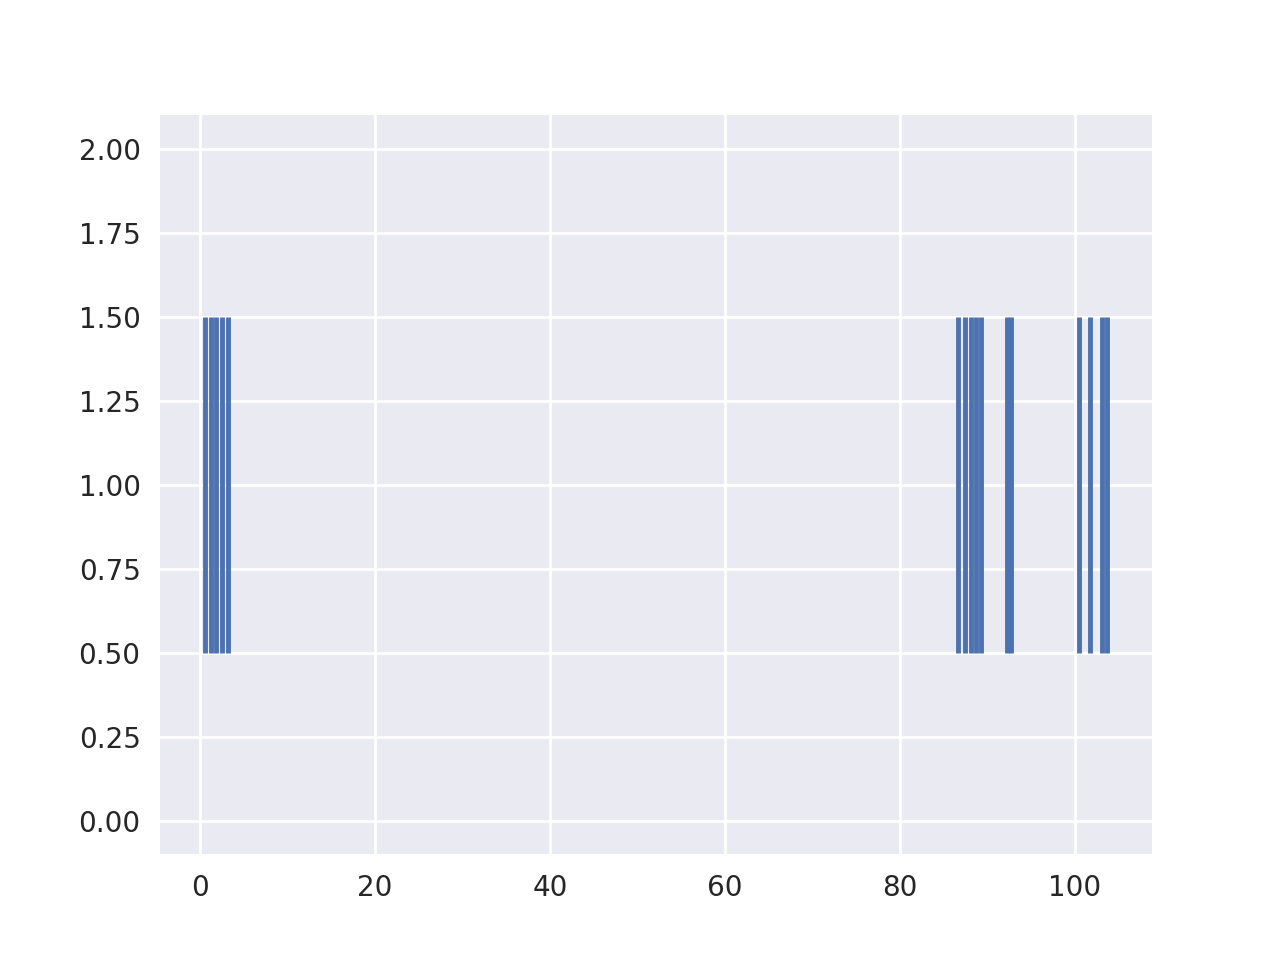

In [30]:
results = read_table()
deltas = timedeltas(results)
fig = plt.figure()
plt.eventplot(np.cumsum(deltas));

In [36]:
'hel-lo---1---2'.split('---')

['hel-lo', '1', '2']